In [45]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import tratamento as trata
import classificacao as classifica

from functools import partial

In [46]:
dados=pd.read_csv("dados/reportagens_folha_analise.csv")

In [47]:
dados.sample(5)

,data,titulo,url,conteudo
509,2021-03-06,Bolsonaro fez transações semelhantes às que le...,https://www1.folha.uol.com.br/poder/2021/03/bo...,O presidente Jair Bolsonaro (sem partido) fez ...
119,2020-10-02,"'Novo Deltan', coordenador da Lava Jato de Cur...",https://www1.folha.uol.com.br/poder/2020/10/no...,Com um pouco menos de um mês como substituto d...
10,2020-09-05,"À frente do STF, Toffoli impôs freios à Lava J...",https://www1.folha.uol.com.br/poder/2020/09/a-...,Dois anos depois de tomar posse como president...
362,2021-01-23,Gilmar suspende julgamento no Rio sobre foro d...,https://www1.folha.uol.com.br/poder/2021/01/gi...,"O ministro Gilmar Mendes, do STF (Supremo Trib..."
570,2021-03-22,Novas falas de Bolsonaro sobre Forças Armadas ...,https://www1.folha.uol.com.br/poder/2021/03/no...,A nova tentativa do presidente Jair Bolsonaro ...


## Chamadas das funções

In [48]:
dados['tokens'] = dados['conteudo'].apply(trata.tokeniza)

In [49]:
dados['tokens_limpo'] = dados['tokens'].apply(trata.limpa)

In [50]:
dados['tokens_stem'] = dados['tokens_limpo'].apply(trata.stemmatiza)

In [51]:
dados['tokens_limpo'].head()

0    [após, saída, procurador, deltan, dallagnol, c...
1    [stj, superior, tribunal, justiça, decidiu, ne...
2    [poucos, dias, psdb, confirmar, candidatura, b...
3    [com, decisão, ministro, josé, múcio, monteiro...
4    [avaliação, maioria, ministros, stf, supremo, ...
Name: tokens_limpo, dtype: object

## contagem

In [52]:
dados['contagem']=dados['tokens_limpo'].apply(trata.conta)

In [53]:
dados['contagem_ordenada']=dados['contagem'].apply(trata.ordena)

## variabilidade

In [54]:
dados['contagem_min']=dados['contagem_ordenada'].apply(trata.minimo)
dados['contagem_max']=dados['contagem_ordenada'].apply(trata.maximo)
dados['contagem_media']=dados['contagem_ordenada'].apply(trata.media)

In [55]:
dados['contagem_media'].head(10)

0    1.555556
1    1.500000
2    1.363636
3    1.166667
4    1.111111
5    1.142857
6    1.111111
7    1.800000
8    1.200000
9    1.076923
Name: contagem_media, dtype: float64

## Algumas visualizações

In [56]:
todos_tokens=[token for conteudo in dados['tokens_limpo'] for token in conteudo]

In [57]:
todos_tokens_unico=list(set(todos_tokens))

In [58]:
contagem_todos=[todos_tokens.count(x) for x in todos_tokens_unico]

In [59]:
df_tokens=pd.DataFrame(list(zip(todos_tokens_unico, contagem_todos)), columns=['Tokens', 'Cont'])

In [60]:
df_tokens=df_tokens[~df_tokens.duplicated()]

In [61]:
df_tokens.sort_values(by=['Cont'], ascending=False, inplace=True)

In [62]:
df_tokens.describe()

,Cont
count,27683.000000
mean,14.774085
std,63.969307
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,2919.000000


In [63]:
df_tokens_maiores=df_tokens.iloc[:10,:]

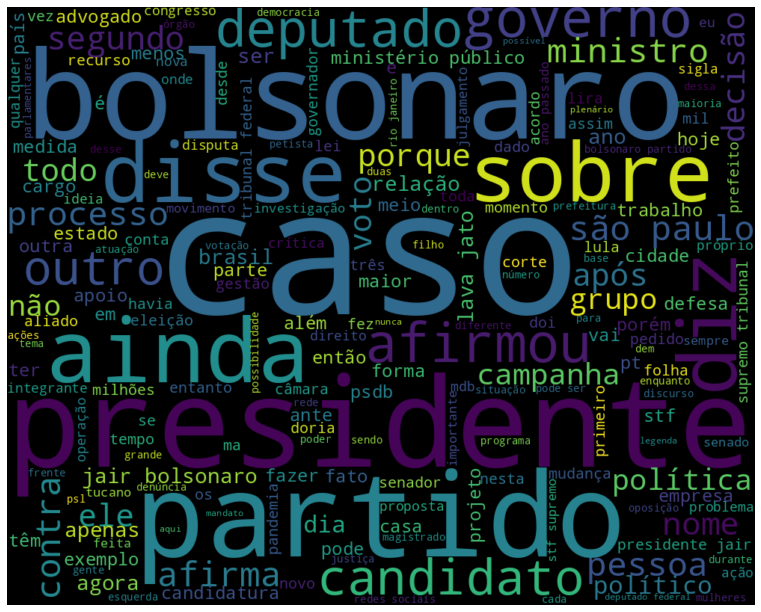

In [64]:
wc=WordCloud(width=1000, height=800, margin=0).generate(" ".join(todos_tokens))
plt.figure(figsize=(20,11))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)

<BarContainer object of 10 artists>

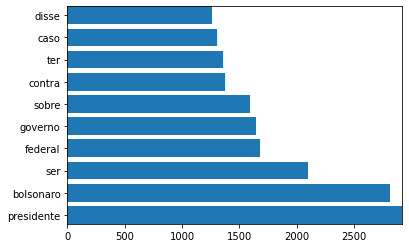

In [65]:
plt.margins(x=0, y=0)
plt.barh(df_tokens_maiores['Tokens'], df_tokens_maiores['Cont'])

## Classificação 

In [66]:
dados['vetorizado']=dados['tokens_limpo'].apply(partial(classifica.vetoriza, min_df=5,max_df=0.7,ngram=(1,3), max_features=1000))

ValueError: max_df corresponds to < documents than min_df

## Qual é o caso?

In [ ]:
### a coluna tokens_limpo tem uma lista com os os tokens, então é preciso procurar a palavra dentro da lista

In [ ]:
def caso(texto:pd.Series):
    if 'caso' in texto:
        return True
    else:
        return False

In [ ]:
dados['caso']=dados['tokens_limpo'].apply(caso)

In [ ]:
caso=dados[dados['caso']==True]['tokens_limpo']

In [ ]:
caso